<a href="https://colab.research.google.com/github/bob8dod/DeepLearning-with-PyTorch/blob/main/Chapter%20%232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#파이토치 기초(PyTorch Basic)



## 텐서 조작하기(Tensor Manipulation) 1

### 넘파이로 텐서 만들기(벡터와 행렬 만들기)

In [38]:
import numpy as np

In [39]:
# Numpy로 1차원 텐서인 벡터 생성
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

[0. 1. 2. 3. 4. 5. 6.]


In [40]:
# 1차원 텐서인 벡터의 차원과 크기를 출력
print('Rank of t: ', t.ndim)
print('Shape of t: ', t.shape) # (7, )는 (1, 7)을 의미

Rank of t:  1
Shape of t:  (7,)


In [41]:
# 각 벡터의 원소에 접근하는 방법 (인덱스를 통한 원소 접근)
print('t[0] t[1] t[-1] = ', t[0], t[1], t[-1])
print('t[2:5] t[4:-1]  = ', t[2:5], t[4:-1]) # 슬라이싱

t[0] t[1] t[-1] =  0.0 1.0 6.0
t[2:5] t[4:-1]  =  [2. 3. 4.] [4. 5.]


In [42]:
# 2차원 행렬
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)
print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
Rank  of t:  2
Shape of t:  (4, 3)


파이토치 텐서 선언하기(PyTorch Tensor Allocation)

In [43]:
import torch

In [44]:
# 1차원 텐서인 벡터
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [45]:
print(t.dim())  # rank. -> 차원
print(t.shape)  # shape
print(t.size()) # shape

1
torch.Size([7])
torch.Size([7])


In [46]:
# 2차원 텐서인 행렬
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)
print(t.dim())  # rank.
print(t.size()) # shape

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
2
torch.Size([4, 3])


In [47]:
print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 것만 가져옴.
print(t[:, 1].size()) # 해당 차원 크기

tensor([ 2.,  5.,  8., 11.])
torch.Size([4])


In [48]:
#  브로드캐스팅 : 자동으로 크기를 맞춰서 연산을 수행하게 만드는 기능
# 크기가 같은 경우
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

tensor([[5., 5.]])


In [49]:
# 크기가 다른 텐서들 간의 연산 (벡터와 스칼라가 덧셈 연산)
# Vector + scalar
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

tensor([[4., 5.]])


In [50]:
# 벡터 간 연산에서 브로드캐스팅이 적용되는 경우
# 2 x 1 Vector + 1 x 2 Vector
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

tensor([[4., 5.],
        [5., 6.]])


두 텐서가 어떻게 변경 됐는지
```
[1, 2]  
==> [[1, 2],  
         [1, 2]]  
[3]  
[4]  
==> [[3, 3],  
        [4, 4]]

```



In [51]:
# 행렬 곱셈과 곱셈의 차이(Matrix Multiplication Vs. Multiplication)
# 행렬 곱셈(.matmul)
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


In [52]:
# 일반 곱셈(.mul()) -> element-wise 곱셈
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


두 행렬의 크기는 브로드캐스팅이 된 후에 곱셈이 수행   ->  m2의 크기가 변환


```
# m2의 크기가 변환
[1]
[2]
==> [[1, 1],
         [2, 2]]
```



In [53]:
# 평균을 구하는 방법
# 1차원
t = torch.FloatTensor([1, 2])
print(t)
print(t.mean())
print()
# 2차원
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.mean())

tensor([1., 2.])
tensor(1.5000)

tensor([[1., 2.],
        [3., 4.]])
tensor(2.5000)


In [54]:
# 차원(dimension)을 인자로 주는 경우
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.mean(dim=0)) # -> 첫번째 차원 ('행') 을 제거한다는 의미, '열'의 평균
print(t.mean(dim=1)) # -> 두번째 차원 ('열') 을 제거한다는 의미, '행'의 평균
print(t.mean(dim=-1)) # -> 마지막번째 차원 (여기선 '열') 을 제거한다는 의미, '행'의 평균

tensor([2., 3.])
tensor([1.5000, 3.5000])
tensor([1.5000, 3.5000])


In [55]:
# 덧셈(Sum)
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1)) # 열을 제거

tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


In [56]:
# 최대(Max)와 아그맥스(ArgMax)
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.max())
print(t.max(dim=0)) # 첫번째 차원('행')을 제거, Returns two values: max and argmax

tensor([[1., 2.],
        [3., 4.]])
tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [57]:
# t.max(dim=0) Returns two values: max and argmax
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [58]:
print(t.max(dim=1))
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


## 텐서 조작하기(Tensor Manipulation) 2

### 파이토치 텐서 선언하기(PyTorch Tensor Allocation)

In [60]:
# 뷰(View) - 원소의 수를 유지하면서 텐서의 크기 변경. 매우 중요
# 넘파이에서의 리쉐이프(Reshape)와 같은 역할
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)
print(ft.shape)

torch.Size([2, 2, 3])


In [61]:
# ft 텐서를 view를 사용하여 크기(shape)를 2차원 텐서로 변경
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


-1은 첫번째 차원은 사용자가 잘 모르겠으니 파이토치에 맡기겠다는 의미이고, 3은 두번째 차원의 길이는 3을 가지도록 하라는 의미  
 (2, 2, 3) -> (2 × 2, 3) -> (4, 3)

In [62]:
# 3차원 텐서의 크기 변경
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


In [66]:
# 스퀴즈(Squeeze) - 1인 차원을 제거
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)
print()
# 두번째 차원이 1이므로 squeeze를 사용하면 (3,)의 크기를 가지는 텐서로 변경
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])

tensor([0., 1., 2.])
torch.Size([3])


In [67]:
# 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원을 추가
# 스퀴즈와 정반대입니다. 특정 위치에 1인 차원을 추가
ft = torch.Tensor([0, 1, 2])
print(ft.shape)
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)

torch.Size([3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [68]:
# view로도 구현 가능
# 2차원으로 바꾸고 싶으면서 첫번째 차원은 1이기를 원한다면 view에서 (1, -1)을 인자로 사용
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


In [69]:
# 두번째 차원에 1을 추가
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


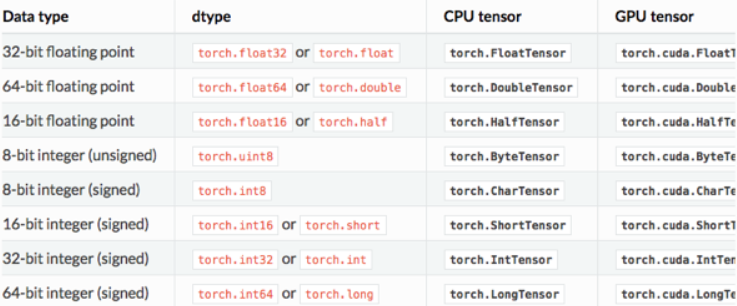

In [70]:
# 타입 캐스팅 : 자료형을 변환
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)
print(lt.float())

tensor([1, 2, 3, 4])
tensor([1., 2., 3., 4.])


In [72]:
# Byte 타입
bt = torch.ByteTensor([True, False, False, True])
print(bt)
print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


In [73]:
# 연결하기(concatenate)
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

print(torch.cat([x, y], dim=0)) # dim=0은 첫번째 차원을 늘리라는 의미
print(torch.cat([x, y], dim=1)) # dim=1은 두번째 차원을 늘리라는 의미

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [75]:
# 스택킹(Stacking)
# 때로는 연결을 하는 것보다 스택킹이 더 편리할 때가 있음 -> 많은 연산을 포함
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])
print(torch.stack([x, y, z]))
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0)) # concat 을 이용한 것

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


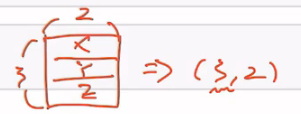

In [77]:
# 두번째 차원이 증가하도록 쌓으라는 의미
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


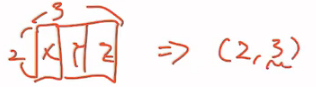

In [78]:
# ones_like와 zeros_like - 0으로 채워진 텐서와 1로 채워진 텐서
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)
print(torch.ones_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기

tensor([[0., 1., 2.],
        [2., 1., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [81]:
# In-place Operation (덮어쓰기 연산)
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [83]:
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x) # 기존의 값 출력 (덮어쓰기로 연산결과가 저장됨)

tensor([[ 4.,  8.],
        [12., 16.]])
tensor([[ 4.,  8.],
        [12., 16.]])
